# Empirical Process

An empirical process generated from $x_i \sim \mathrm{Uniform}(0,1)$

In [1]:
rm(list = ls())

library(tibble)
library(ggplot2)


plot.em <- function(n, coll, Scal = 0){
  
  x <- sort( runif(n) )

  dd <- tibble(x0 = c(0, x),
               x1 = c(x, 1),
               ste = (0:n)/n,
               ) %>% 
    dplyr::mutate(yd0 = ste - x0, yd1 = ste - x1) 
  
  p0 <- ggplot(dd)+theme_bw() + xlab("") + ylab("")
  
  
  if (Scal == 0){
    p <- p0  +  ylim(0, 1)+ 
           geom_segment(aes(x = x0, y = ste, xend = x1, yend = ste ), color = coll)
  }

  if (Scal == 1){
    p <- p0 + ylim(-0.2, 0.2) + 
           geom_segment(aes(x = x0, y = yd0, xend = x1, yend = yd1), color = coll)
  }

  if (Scal == 2){
    p <- p0  + # ylim(-1, 1)+ 
           geom_segment(aes(x = x0, y = sqrt(n) * yd0, xend = x1, yend = sqrt(n) * yd1 ), color = coll)
  }
  return(p)
}


ECDF

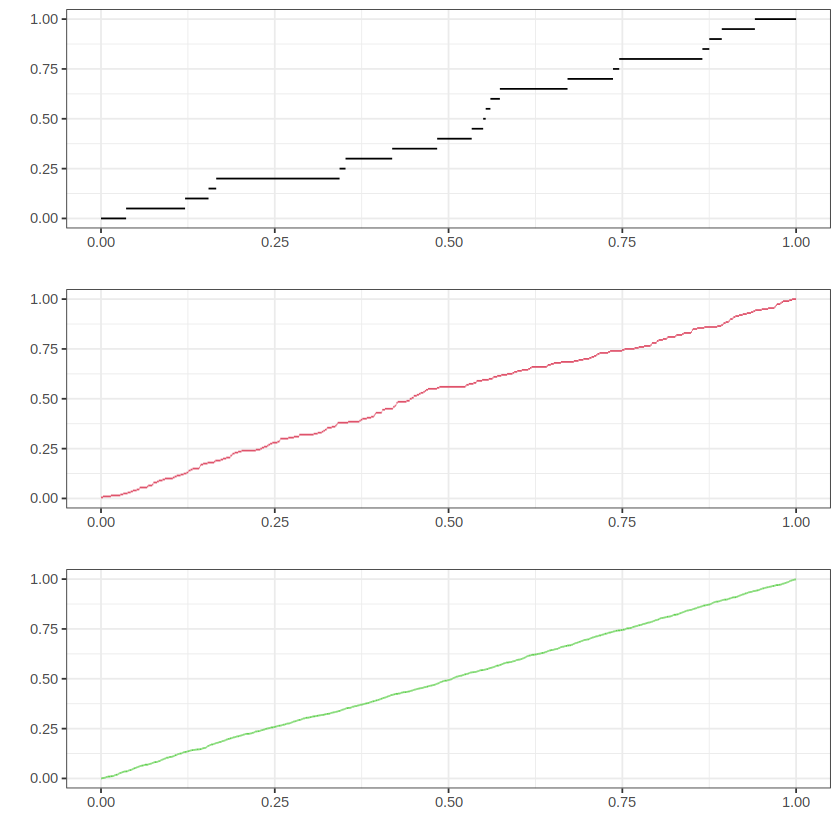

In [2]:
p1 <- plot.em(20, 1, 0)
p2 <- plot.em(200, 2, 0)
p3 <- plot.em(2000, 3, 0)

gridExtra::grid.arrange(p1, p2, p3)

The average version

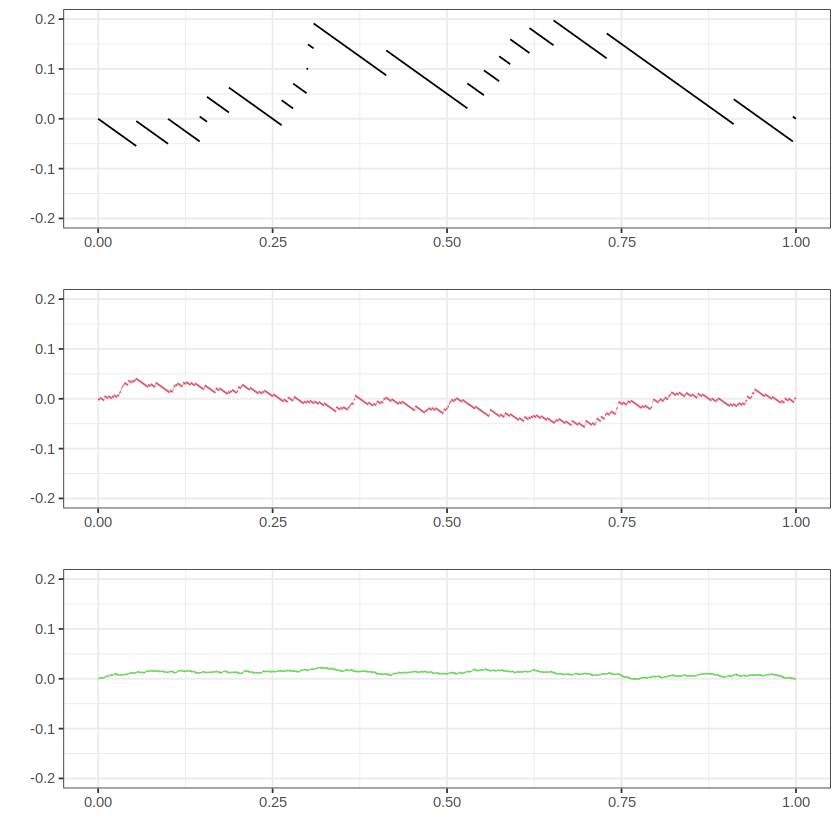

In [3]:
p1 <- plot.em(20, 1, 1)
p2 <- plot.em(200, 2, 1)
p3 <- plot.em(2000, 3, 1)

gridExtra::grid.arrange(p1, p2, p3)

The scaled version $\sqrt{n} (F_n(x) - F(x))$

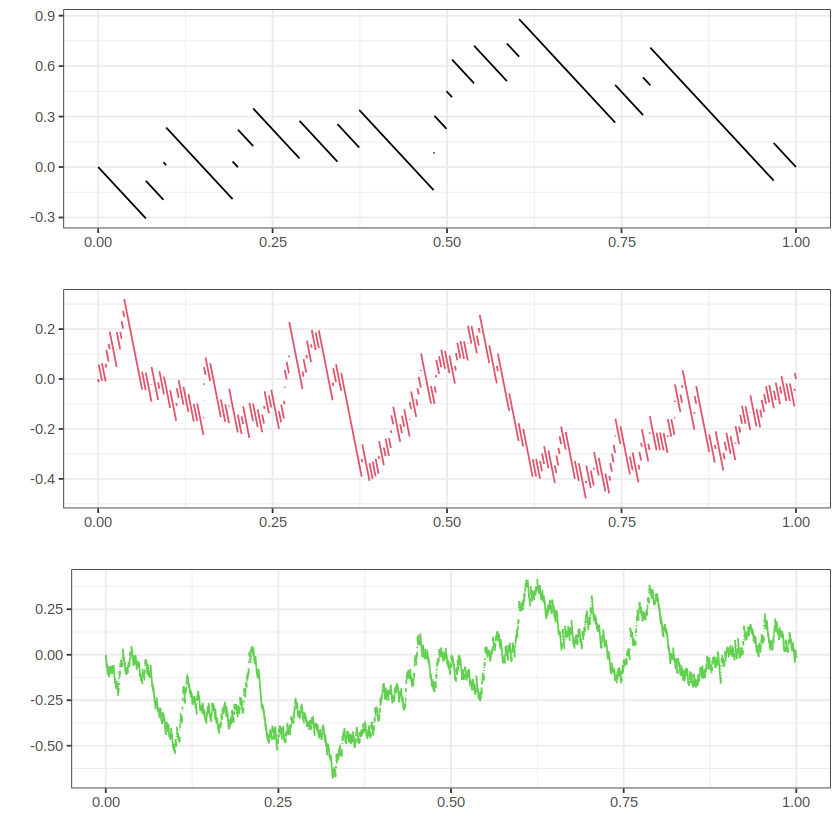

In [4]:

p1 <- plot.em(20, 1, 2)
p2 <- plot.em(200, 2, 2)
p3 <- plot.em(2000, 3, 2)

gridExtra::grid.arrange(p1, p2, p3)